#Forecasting by using advanced modelling methods

In case of a complex time seriers data example which has missing data, and inconsistent patterns we can use already built in processes in python which can select the best method for us.

In this project, I have used `phophet` as the main package which handles time series forecasting. It is a package open sourced by Facebook whivch they developed after running many forecasts at an incredible scale. They have developed this model which is more robust to missing and irregular data. You can read more about the package here: https://facebook.github.io/prophet/

## Install `prophet`

To increase performance, fbprophet actually compiles C++ code to run the models.

In [1]:
pip install --upgrade prophet

## Install `finstmt`

`finstmt` is apython package that contains classes to work with financial statement data. It can calculate free cash flows and help project financial statements.


In [3]:
#pip install --upgrade finstmt
!pip install pandas==1.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.10.0 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.


In [4]:
from finstmt import IncomeStatements, BalanceSheets, FinancialStatements
import pandas as pd

bs_df = pd.read_excel('WMT Balance Sheet.xlsx', index_col=0)
inc_df = pd.read_excel('WMT Income Statement.xlsx', index_col=0)

bs_data = BalanceSheets.from_df(bs_df)
inc_data = IncomeStatements.from_df(inc_df)
stmts = FinancialStatements(inc_data, bs_data)

INFO: Was not able to extract data from the following names: {'Investments', 'Other Assets', 'Other Liabilities', 'Net Debt'}


INFO:finstmt:Was not able to extract data from the following names: {'Investments', 'Other Assets', 'Other Liabilities', 'Net Debt'}


INFO: Was not able to extract data from the following names: {'EBIT Margin', 'Net Income Com', 'Revenue Growth', 'EBITDA', 'Gross Margin', 'EPS Diluted', 'Net Income - Non-Controlling int', 'EPS', 'Consolidated Income', 'Shares (weighted)', 'Shares (basic)', 'Earnings Before Tax Margin', 'Net Income - Discontinued ops', 'Preferred Dividends', 'EBITDA Margin', 'Net Profit Margin', 'Shares (weighted, diluted)', 'Gross Profit', 'Dividend per Share', 'Free Cash Flow margin', 'Profit Margin'}


/usr/local/lib/python3.10/dist-packages/finstmt/findata/period_data.py:116: UserWarning: Previously had ebit extracted from "Operating Income". Replacing with value from "EBIT"
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/finstmt/findata/period_data.py:116: UserWarning: Previously had ebit extracted from "Operating Income". Replacing with value from "EBIT"
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/finstmt/findata/period_data.py:116: UserWarning: Previously had ebit extracted from "Operating Income". Replacing with value from "EBIT"
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/finstmt/findata/period_data.py:116: UserWarning: Previously had ebit extracted from "Operating Income". Replacing with value from "EBIT"
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/finstmt/findata/period_data.py:116: UserWarning: Previously had ebit extracted from "Operating Income". Replacing with value from "EBIT"
  warnings.warn(
/usr/local/lib/python3.10/dist

### Viewing the data

In [ ]:
stmts

### We have 39 periods of data for each Balance sheet and Income statement. This should be good enough to forecast even considering seasonality

## Run Forecasts

Forecasting the entire financial statements with `finstmt` is as easy as calling `.forecast`. You can spacify within `.forecast` how many periods you want to forecast and the frequency. The default is to forecast 5 periods with annual frequency. `finstmt` will automatically detect the frequency of the data, so it will set `3M` as the `freq` with quarterly data, but it can be overrided. As this is a quarterly forecast, we want to extend it to 12 periods so we set `periods=12`.

But before we run the forecast, we want to set the forecast method for all the items to `auto` which means use `prophet` for the forecast. If the data does not have seasonality, then some combination of `cagr`, `trend`, `mean`, and `recent` may be used.

In [5]:
stmts.config.update_all(['forecast_config', 'method'], 'auto')

### Running the forecasts

In [6]:
fcst_stmts = stmts.forecast(periods=12)

INFO: Forecasting Income Statement


INFO:finstmt:Forecasting Income Statement
  0%|          | 0/16 [00:00<?, ?it/s]DEBUG:cmdstanpy:input tempfile: /tmp/tmp3aem_4dg/8cl76do6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3aem_4dg/_rxnxz7c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95616', 'data', 'file=/tmp/tmp3aem_4dg/8cl76do6.json', 'init=/tmp/tmp3aem_4dg/_rxnxz7c.json', 'output', 'file=/tmp/tmp3aem_4dg/prophet_modeldrh31zc_/prophet_model-20241104232841.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:28:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:28:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:39: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float6

INFO: Forecasting Balance Sheet



INFO:finstmt:Forecasting Balance Sheet
  0%|          | 0/38 [00:00<?, ?it/s]DEBUG:cmdstanpy:input tempfile: /tmp/tmp3aem_4dg/qtnonmum.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3aem_4dg/gmiym1d_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75705', 'data', 'file=/tmp/tmp3aem_4dg/qtnonmum.json', 'init=/tmp/tmp3aem_4dg/gmiym1d_.json', 'output', 'file=/tmp/tmp3aem_4dg/prophet_model4lof5yv3/prophet_model-20241104232843.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:28:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:28:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:39: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64'

INFO: Balancing balance sheet


INFO:finstmt:Balancing balance sheet


INFO: Balanced in 4.4s


INFO:finstmt:Balanced in 4.4s
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:72: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  return pd.date_range(
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:39: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:72: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  return pd.date_range(
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:39: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()


In [7]:
fcst_stmts

,10/31/2019,01/31/2020,04/30/2020,07/31/2020,10/31/2020,01/31/2021,04/30/2021,07/31/2021,10/31/2021,01/31/2022,04/30/2022,07/31/2022
Revenue,"$129,050,538,489","$141,605,461,817","$129,953,626,426","$133,087,233,694","$131,748,209,999","$145,531,697,298","$132,734,440,967","$136,889,780,237","$135,458,296,259","$149,630,497,827","$135,479,607,941","$140,492,967,294"
Cost of Goods Sold,"$96,717,766,906","$106,675,473,973","$97,917,376,995","$99,634,601,536","$98,802,824,144","$109,727,041,533","$100,229,554,255","$102,820,160,425","$101,875,695,095","$113,652,857,801","$102,649,979,147","$106,028,112,452"
Gross Profit,"$32,332,771,584","$34,929,987,845","$32,036,249,431","$33,452,632,158","$32,945,385,854","$35,804,655,765","$32,504,886,713","$34,069,619,812","$33,582,601,164","$35,977,640,026","$32,829,628,794","$34,464,854,842"
SG&A Expense,"$27,742,306,480","$28,564,377,804","$27,513,123,455","$28,359,707,851","$28,755,406,520","$30,103,951,682","$28,067,502,430","$29,031,777,418","$29,347,637,128","$30,792,148,438","$28,639,712,701","$29,691,584,531"
Interest Expense,"$855,021,871","$842,051,342","$863,701,775","$866,117,761","$868,083,388","$821,633,956","$895,072,972","$882,335,093","$911,806,468","$877,529,102","$966,165,120","$908,992,183"
Income Tax Expense,"$2,097,157,268","$2,755,416,804","$2,091,027,614","$3,240,037,144","$1,764,556,809","$2,588,831,829","$2,040,313,847","$3,859,353,080","$1,921,594,231","$2,502,257,651","$1,908,986,194","$4,072,341,170"
R&D Expense,-,-,-,-,-,-,-,-,-,-,-,-
Depreciation & Amortization Expense,-,-,-,-,-,-,-,-,-,-,-,-
Other Operating Expenses,-,-,-,-,-,-,-,-,-,-,-,-
Gain on Sale of Investments,-,-,-,-,-,-,-,-,-,-,-,-


## Plotting a subset of the results

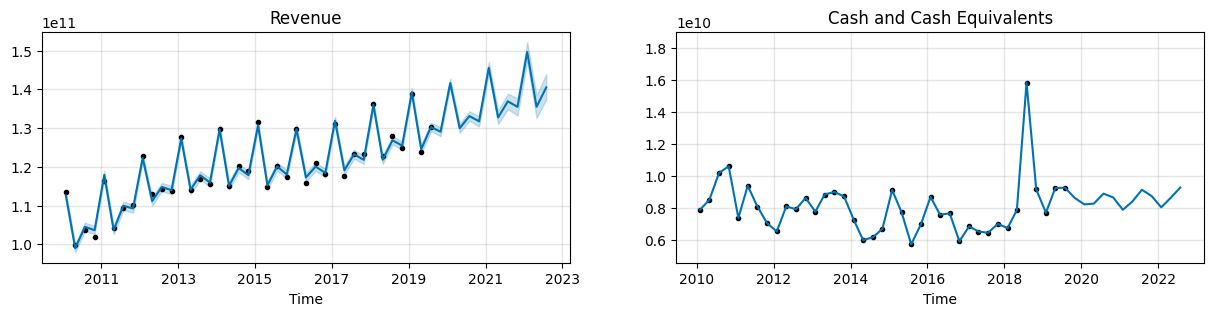

In [8]:
fcst_stmts.plot(subset=['revenue','cash'])

## Plotting all the results

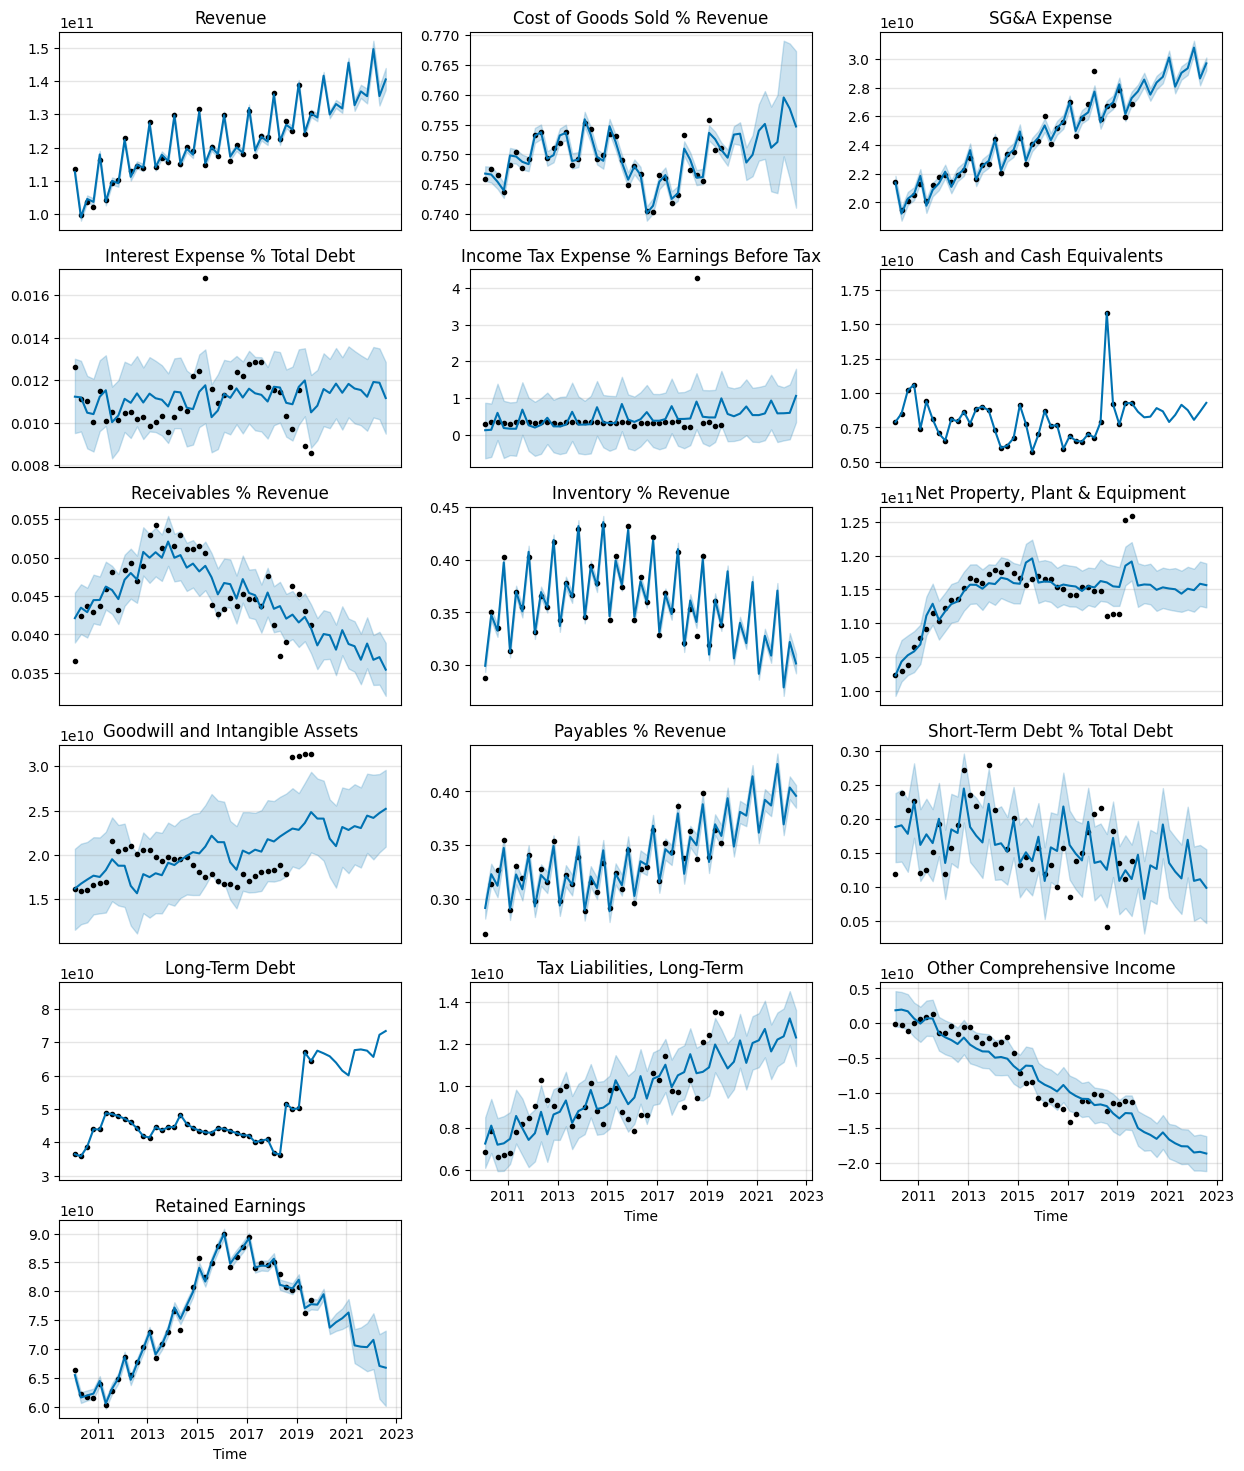

In [9]:
fcst_stmts.plot()

### We can see that it has forecasted the entire financial statements 12 periods into the future. To see how it got there we can take a look at the assumptions it has used in the forecasts

In [10]:
fcst_stmts.forecast_assumptions

,Method,% of,Cap,Floor,Plug,Manual Levels
Revenue,auto,None,None,None,False,NaN
Cost of Goods Sold,auto,revenue,None,None,False,NaN
SG&A Expense,auto,None,None,None,False,NaN
Interest Expense,auto,total_debt,None,None,False,NaN
Income Tax Expense,auto,ebt,None,None,False,NaN
Cash and Cash Equivalents,manual,None,None,None,True,"[8645833393.696442, 8238227317.602028, 8286040..."
Receivables,auto,revenue,None,None,False,NaN
Inventory,auto,revenue,None,None,False,NaN
"Net Property, Plant & Equipment",auto,None,None,None,False,NaN
Goodwill and Intangible Assets,auto,None,None,None,False,NaN


All of them use the method `auto` which means let `prophet` decide how to forecast it aside from items like 'Cash and Cash Equivalents' and 'Long-term debt'. It is because these items are ultimately being used as plugs to balance the balance sheet. Some items are being forecasted as percentages of other items. Let's take a closer look at some of these forecasts. After the forecast has run, in the forecast statements, a `.forecasts` dictionary is created, where it has keys of the same keys used to look up the financial items and values as a `Forecast` object. From this `Forecast` object we can get more information such as the model, as well as plots.

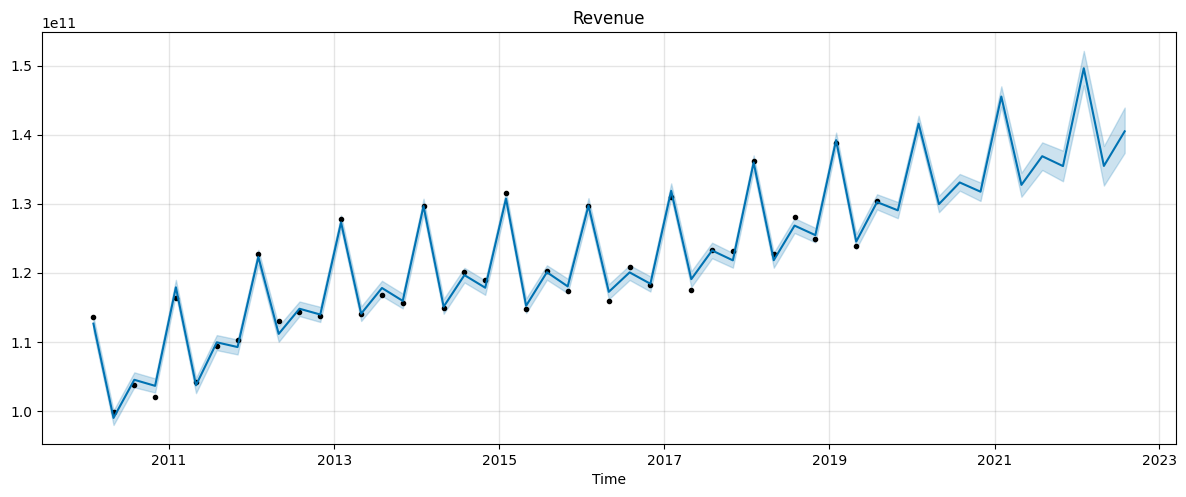

In [12]:
fcst_stmts.forecasts['revenue'].plot()

We can see that `fbprophet` also did a good job with the patterns in the time series. It also has a nice plotting output which shows the historical points as well as the historical fit and the predictions, and confidence intervals for the predictions.

For items which are forecasted as a percentage of another item, the forecast is actually on those percentages, then those percentages are combined with the other item to create the forecast. So when you view the plots it will be a plot of forecasting the percentages.


## Modifying `finstmt` Forecasts
`finstmt` has a configuration system so you can modify how any item is forecasted and do things like- add custom names for items or add additional items.

Assuming the company we are forecasting has a very flexible workforce. They are able to hire labor when needed and lay them off when not. So the SG&A expense should be tied to sales, which is not something you want for most companies.
Let's update the forecast configuration to make SG&A forecasted as a percentage of slaes.


In [14]:
stmts.sga

,SG&A Expense
2010-01-31,2.142400e+10
2010-04-30,1.945600e+10
2010-07-31,2.009800e+10
2010-10-31,2.052200e+10
2011-01-31,2.128500e+10
2011-04-30,2.011600e+10
2011-07-31,2.121300e+10
2011-10-31,2.175700e+10
2012-01-31,2.193900e+10
2012-04-30,2.144500e+10


In [15]:
stmts.config.update('sga', ['forecast_config', 'pct_of'], 'revenue')
stmts.config.update('int_exp', ['forecast_config', 'method'], 'mean')

Now we look at the forecast assumptions to see SG&A now is based off the revenue forecast

In [17]:
stmts.forecast_assumptions

,Method,% of,Cap,Floor,Plug,Manual Levels
Revenue,auto,None,None,None,False,NaN
Cost of Goods Sold,auto,revenue,None,None,False,NaN
SG&A Expense,auto,revenue,None,None,False,NaN
Interest Expense,mean,total_debt,None,None,False,NaN
Income Tax Expense,auto,ebt,None,None,False,NaN
Cash and Cash Equivalents,manual,None,None,None,True,"[8645833393.696442, 8238227317.602028, 8286040..."
Receivables,auto,revenue,None,None,False,NaN
Inventory,auto,revenue,None,None,False,NaN
"Net Property, Plant & Equipment",auto,None,None,None,False,NaN
Goodwill and Intangible Assets,auto,None,None,None,False,NaN


Finally running the forecast again

In [19]:
fcst_stmts = stmts.forecast(periods=12, freq='3M')

INFO: Forecasting Income Statement


INFO:finstmt:Forecasting Income Statement
  0%|          | 0/16 [00:00<?, ?it/s]DEBUG:cmdstanpy:input tempfile: /tmp/tmp3aem_4dg/oltn7z6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3aem_4dg/zu35x4d5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13343', 'data', 'file=/tmp/tmp3aem_4dg/oltn7z6v.json', 'init=/tmp/tmp3aem_4dg/zu35x4d5.json', 'output', 'file=/tmp/tmp3aem_4dg/prophet_modelh1k1748a/prophet_model-20241104235358.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:53:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:53:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:39: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float6

INFO: Forecasting Balance Sheet



INFO:finstmt:Forecasting Balance Sheet
  0%|          | 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:72: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  return pd.date_range(
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:39: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3aem_4dg/cxjbjyoh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3aem_4dg/83zmw392.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71487', 'data', 'file=/tmp/tmp3aem_4dg/cxjbjyoh.json', 'init=/tmp/tmp3aem_4dg/83zmw392.json', 'output', 'file=/tmp/tmp3aem_4dg/prophet_model4k8y50je/prophet_model-202

INFO: Balancing balance sheet


INFO:finstmt:Balancing balance sheet


INFO: Balanced in 0.0s


INFO:finstmt:Balanced in 0.0s
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:72: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  return pd.date_range(
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:39: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:72: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  return pd.date_range(
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:39: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()


In [20]:
fcst_stmts

,10/31/2019,01/31/2020,04/30/2020,07/31/2020,10/31/2020,01/31/2021,04/30/2021,07/31/2021,10/31/2021,01/31/2022,04/30/2022,07/31/2022
Revenue,"$129,050,538,489","$141,605,461,817","$129,953,626,426","$133,087,233,694","$131,748,209,999","$145,531,697,298","$132,734,440,967","$136,889,780,237","$135,458,296,259","$149,630,497,827","$135,479,607,941","$140,492,967,294"
Cost of Goods Sold,"$96,717,766,906","$106,675,473,973","$97,917,376,995","$99,634,601,536","$98,802,824,144","$109,727,041,533","$100,229,554,255","$102,820,160,425","$101,875,695,095","$113,652,857,801","$102,649,979,147","$106,028,112,452"
Gross Profit,"$32,332,771,584","$34,929,987,845","$32,036,249,431","$33,452,632,158","$32,945,385,854","$35,804,655,765","$32,504,886,713","$34,069,619,812","$33,582,601,164","$35,977,640,026","$32,829,628,794","$34,464,854,842"
SG&A Expense,"$27,636,089,546","$28,318,664,426","$27,256,711,141","$28,026,525,374","$28,390,145,327","$29,666,215,938","$27,490,033,490","$28,376,919,931","$28,723,277,595","$29,998,687,565","$27,804,255,271","$28,803,757,556"
Interest Expense,"$879,728,074","$807,765,108","$842,217,382","$812,962,012","$845,509,081","$772,035,648","$856,800,715","$849,885,948","$902,892,852","$818,378,193","$903,627,046","$905,030,631"
Income Tax Expense,"$2,142,919,125","$2,895,094,080","$2,249,820,270","$3,536,182,755","$1,970,571,019","$2,847,410,999","$2,394,970,787","$4,497,676,821","$2,287,780,307","$2,997,492,779","$2,440,745,947","$5,012,145,971"
R&D Expense,-,-,-,-,-,-,-,-,-,-,-,-
Depreciation & Amortization Expense,-,-,-,-,-,-,-,-,-,-,-,-
Other Operating Expenses,-,-,-,-,-,-,-,-,-,-,-,-
Gain on Sale of Investments,-,-,-,-,-,-,-,-,-,-,-,-


Now we can see that the model has updated teh SG&A forecast to be a percentage of sales and the cash forecast to be based off the mean

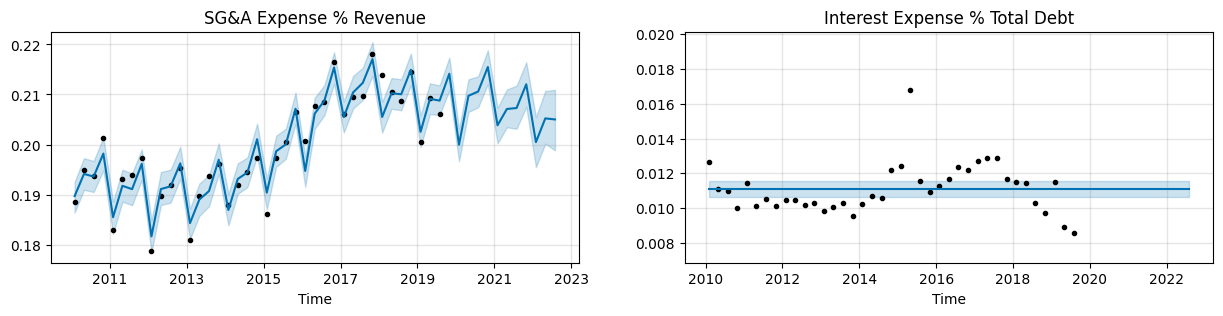

In [21]:
fcst_stmts.plot(subset=['sga', 'int_exp'])

## Adjusting Existing Forecasts

While it is possible to use the `manual` forecast type and pass in the desired growth rates or levels from the beginning, it is often more convenient to first run the forecast, then simply adjust it. The `.to_manual` method of the forecast was added for this purpose.

Either `adjustments` or `replacements` can be passed while updating, and either the level of the item or the growth in the item can be used for the new manual forecast.

In [22]:
# boost second forecast period cash growth by 40%
cash_adjust = [0 for _ in range(12)]
cash_adjust[1] = 0.4
fcst_stmts.forecasts['cash'].to_manual(adjustments=cash_adjust)

# set second forecast period revenue to 80,000,000,000
fcst_stmts.forecasts['revenue'].to_manual(use_levels=True, replacements={1:8e10})

/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:72: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  return pd.date_range(
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:39: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:72: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  return pd.date_range(
/usr/local/lib/python3.10/dist-packages/finstmt/forecast/models/base.py:39: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()


The forecasts are modified in place. We can review the results of that below

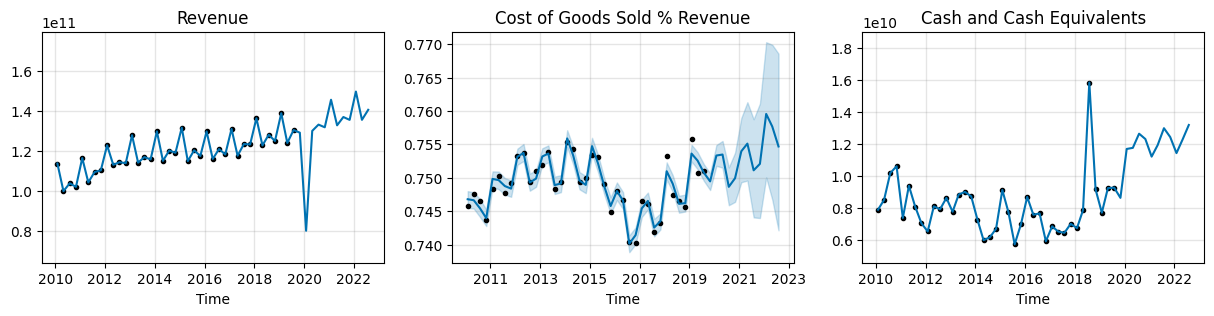

In [25]:
fcst_stmts.plot(subset=['revenue', 'cogs', 'cash'])